In [88]:
%config InlineBackend.figure_formats = ['retina']

import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [89]:
oscars_df = pd.read_csv('oscar_movies_data_2.csv')

In [90]:
oscars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136 entries, 0 to 1135
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Unnamed: 0                                               1136 non-null   int64  
 1   IMDBId                                                   1136 non-null   object 
 2   movie title                                              1136 non-null   object 
 3   language                                                 1136 non-null   object 
 4   country                                                  1136 non-null   object 
 5   runtime (mins)                                           1136 non-null   int64  
 6   mpaarating                                               1136 non-null   object 
 7   metacritic score                                         1136 non-null   float64
 8   budget                      

## MVP Model

In [91]:
oscars_df.drop(columns='Unnamed: 0',inplace = True,axis=1)

In [92]:
oscars_df.corr()

runtime (mins)  metacritic score    budget  \
runtime (mins)                     1.000000         -0.019315  0.216053   
metacritic score                  -0.019315          1.000000 -0.160468   
budget                             0.216053         -0.160468  1.000000   
Total_Noms                              NaN               NaN       NaN   
Director_Avg_Score                -0.029389          0.843538 -0.116738   
...                                     ...               ...       ...   
Writer_Lawrence Kasdan             0.042733         -0.365711  0.112704   
Writer_Paul Thomas Anderson        0.389180          0.281640 -0.087850   
Writer_Pedro Almodóvar            -0.215741          0.270901 -0.208870   
Writer_Quentin Tarantino           0.507414          0.023496  0.075244   
Writer_Woody Allen                -0.585329         -0.061699 -0.284465   

                             Total_Noms  Director_Avg_Score  \
runtime (mins)                      NaN           -0.029389   
metacritic score                    NaN            0.843538   
budget                              NaN           -0.116738   
Total_Noms                          NaN                 NaN   
Director_Avg_Score                  NaN            1.000000   
...                                 ...                 ...   
Writer_Lawrence Kasdan              NaN           -0.608747   
Writer_Paul Thomas Anderson         NaN            0.374778   
Writer_Pedro Almodóvar              NaN            0.360844   
Writer_Quentin Tarantino            NaN            0.040796   
Writer_Woody Allen                  NaN           -0.064502   

                             Total_Director_Movies  Lead_Actor_Avg_Score  \
runtime (mins)                            0.255501             -0.045243   
metacritic score                          0.045808              0.798651   
budget                                    0.150550             -0.116234   
Total_Noms                                     NaN                   NaN   
Director_Avg_Score                        0.054304              0.730323   
...                                            ...                   ...   
Writer_Lawrence Kasdan                   -0.145214             -0.324255   
Writer_Paul Thomas Anderson              -0.164935              0.242937   
Writer_Pedro Almodóvar                   -0.164935              0.325436   
Writer_Quentin Tarantino                 -0.095976             -0.078980   
Writer_Woody Allen                        0.638946             -0.109242   

                             Total_Movies_Lead_Actor  Avg_Rating_by_Genre  \
runtime (mins)                              0.209672            -0.111511   
metacritic score                           -0.102874             0.397882   
budget                                      0.171829            -0.216242   
Total_Noms                                       NaN                  NaN   
Director_Avg_Score                         -0.105291             0.371637   
...                                              ...                  ...   
Writer_Lawrence Kasdan                     -0.053808            -0.298088   
Writer_Paul Thomas Anderson                 0.050807             0.136796   
Writer_Pedro Almodóvar                     -0.228632             0.157404   
Writer_Quentin Tarantino                    0.116347             0.165090   
Writer_Woody Allen                         -0.116114            -0.325273   

                             Buena Vista Pictures  ...         R   Unrated  \
runtime (mins)                          -0.051408  ...  0.162606 -0.080090   
metacritic score                        -0.033783  ...  0.133351  0.018070   
budget                                   0.083538  ... -0.287548 -0.045099   
Total_Noms                                    NaN  ...       NaN       NaN   
Director_Avg_Score                      -0.023195  ...  0.120281  0.023333   
...                                           ...  ...       ... 

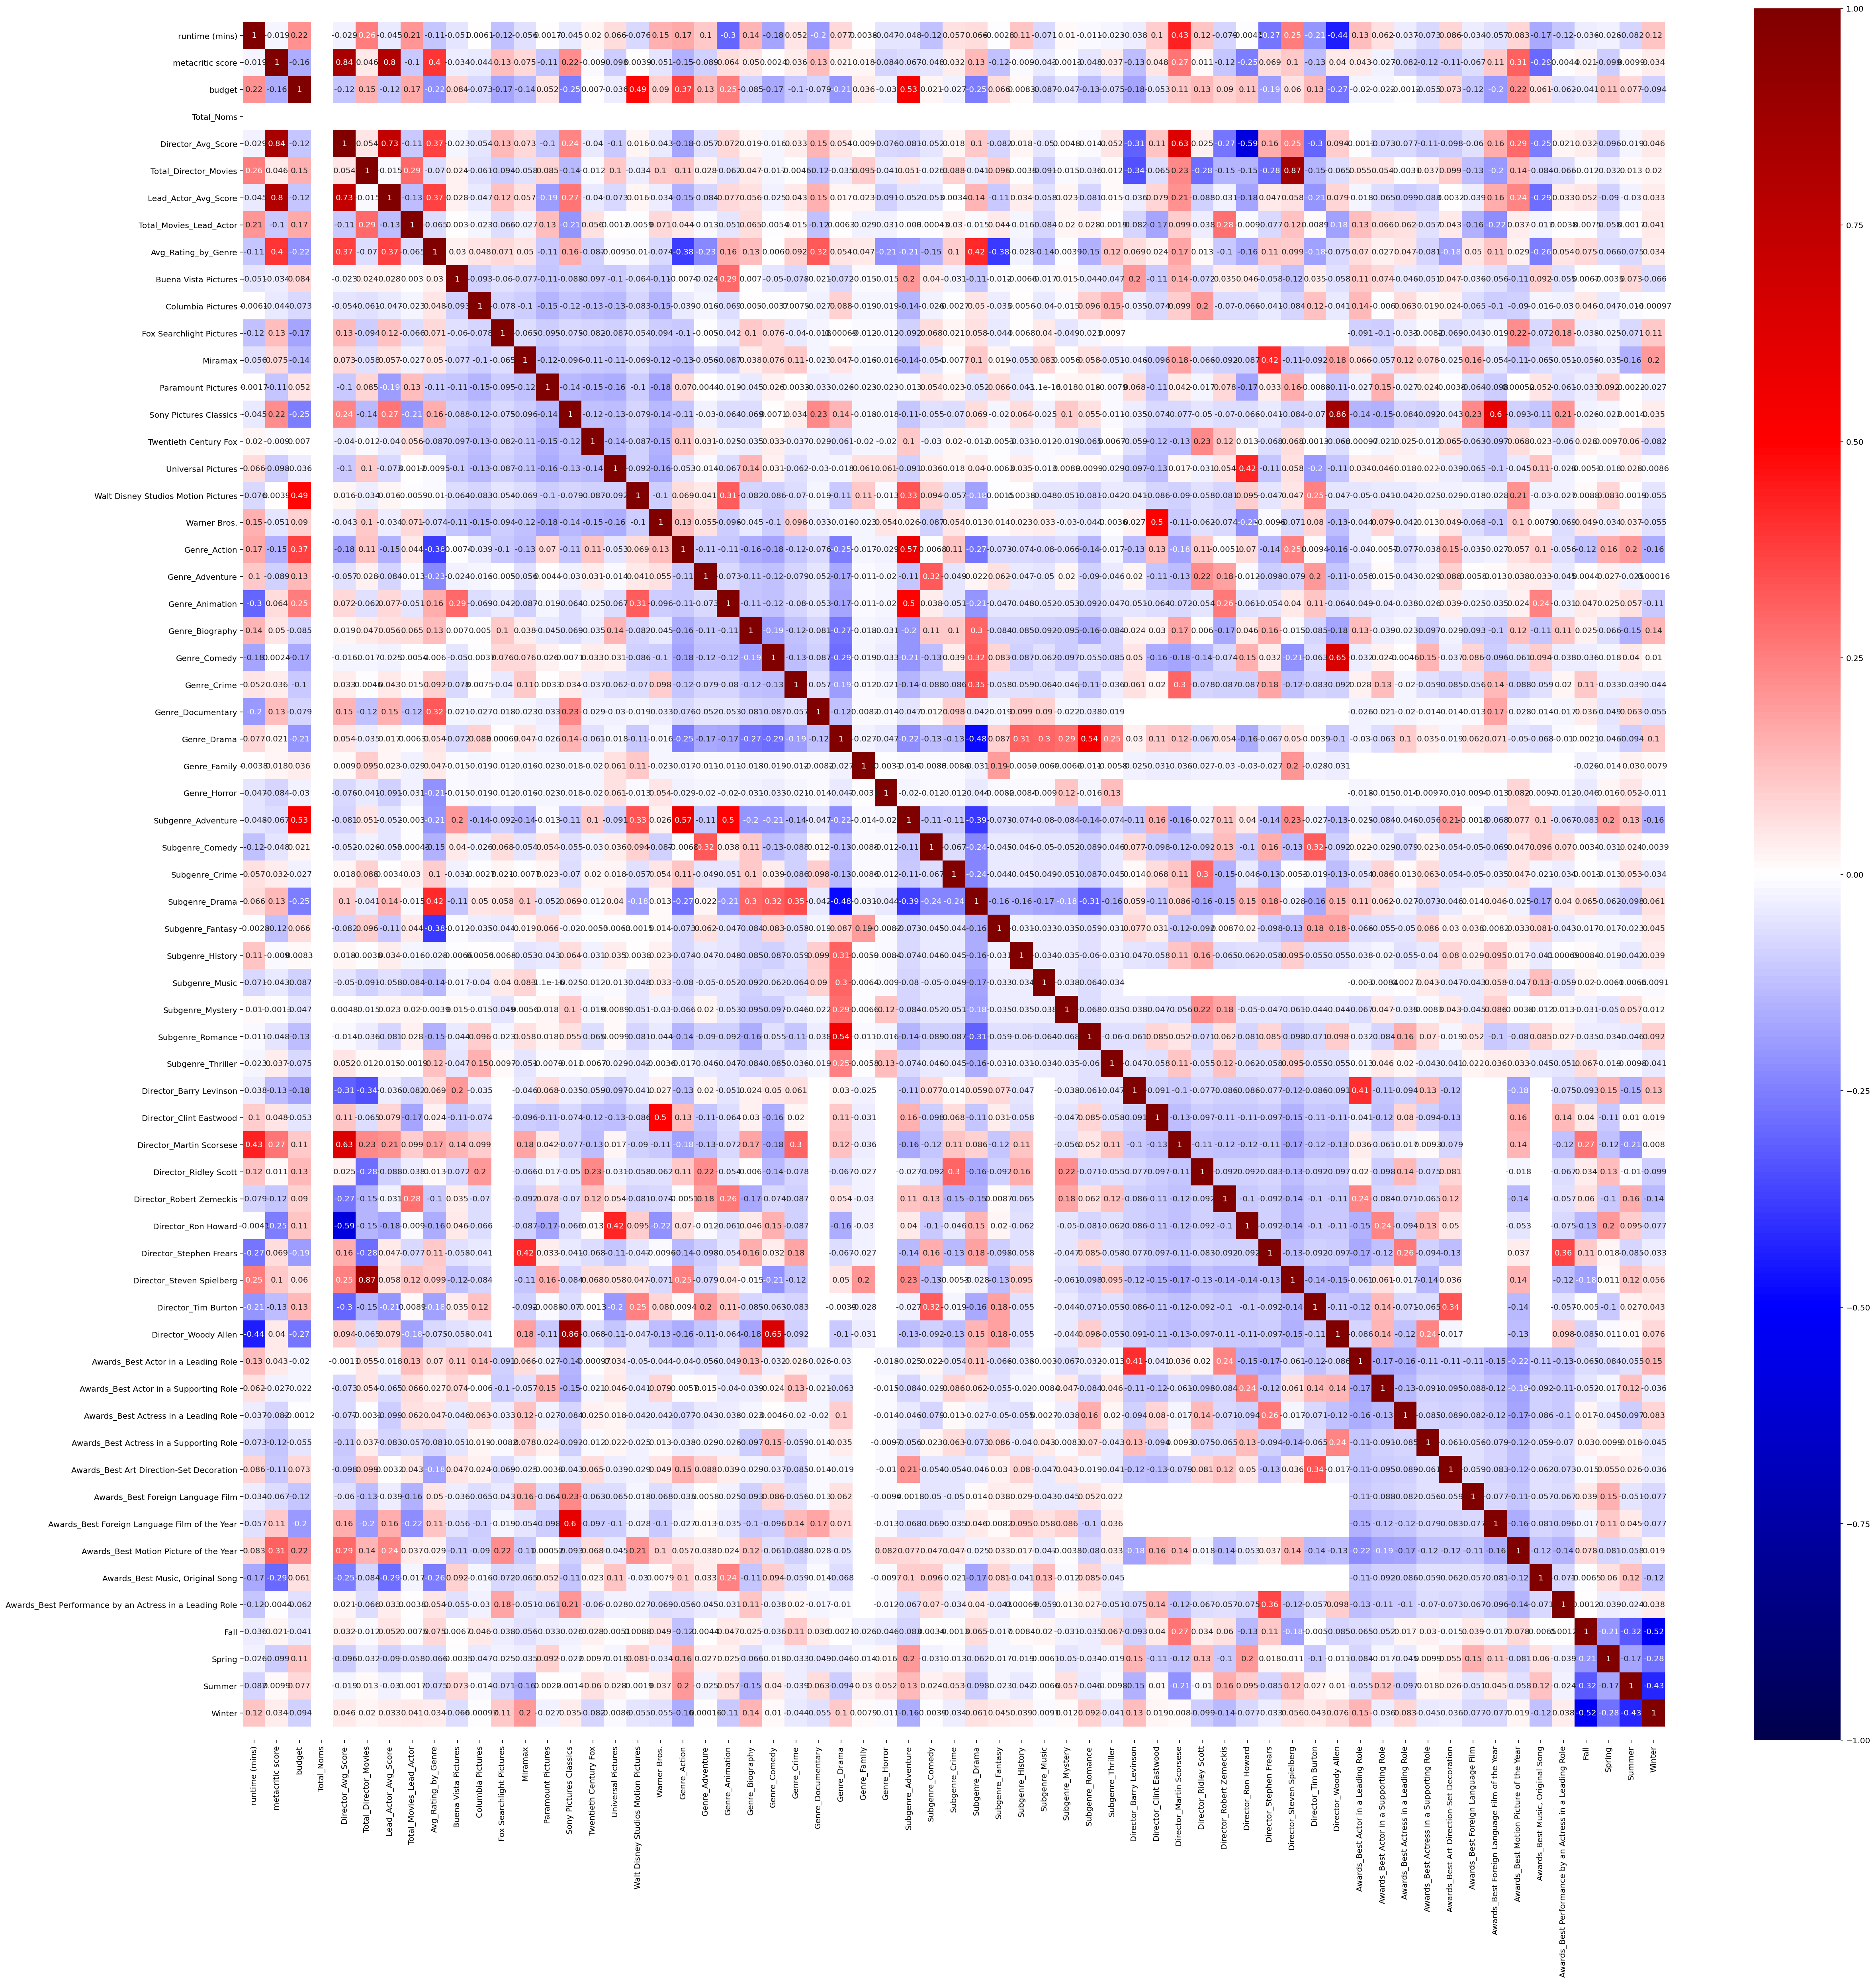

In [74]:
plt.figure(figsize=(40,40))
sns.heatmap(oscars_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

plt.gca().set_ylim(len(oscars_df.corr())+0.5, -0.5);

In [75]:
smaller_df = oscars_df[['metacritic score','Director_Avg_Score','Lead_Actor_Avg_Score','Avg_Rating_by_Genre',
                        'Awards_Best Motion Picture of the Year','Winter']]
#y = oscars_df['metacritic score']

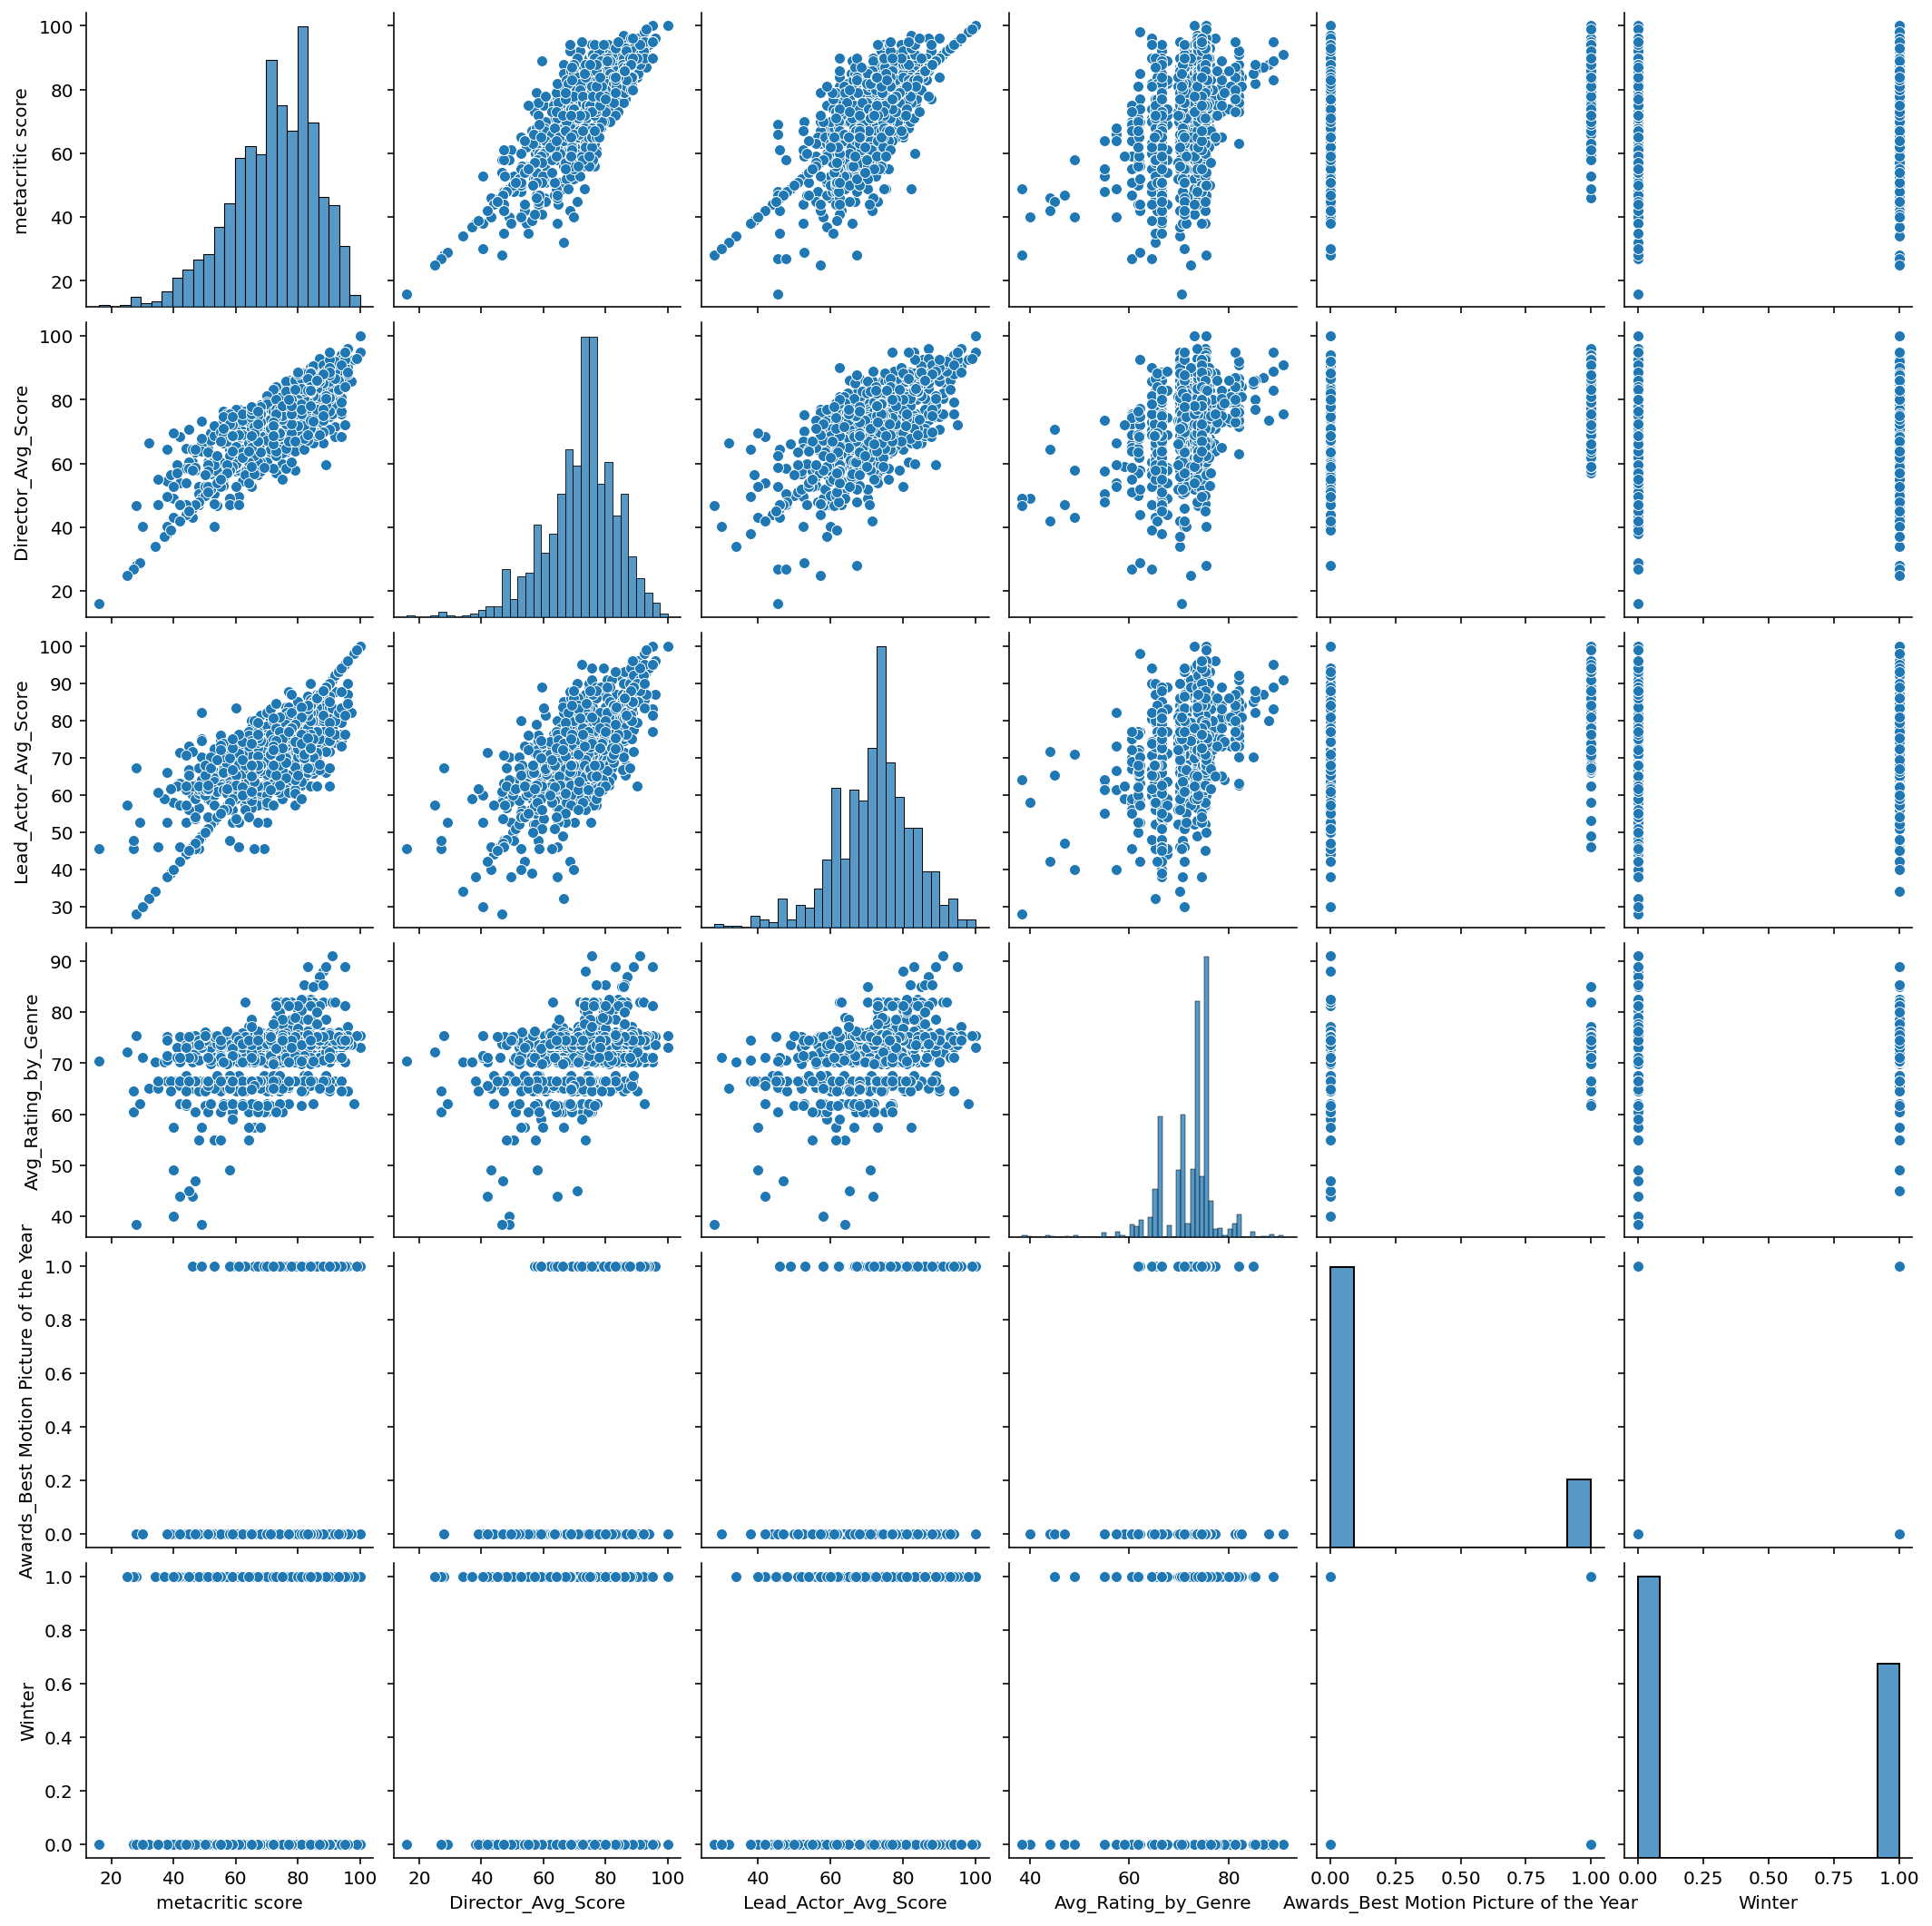

In [76]:
sns.pairplot(smaller_df)

In [77]:
X = oscars_df[['Director_Avg_Score','budget','Lead_Actor_Avg_Score','Avg_Rating_by_Genre','Awards_Best Motion Picture of the Year']]
#y = oscars_df['metacritic score']]
y = oscars_df['metacritic score']

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
std = StandardScaler()
std.fit(X.values)

StandardScaler()

In [80]:
X = std.transform(X.values)

In [81]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [82]:
mvp_model = sm.OLS(y_train,X_train,missing='drop')
mvp_fit = mvp_model.fit()
mvp_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       metacritic score   R-squared (uncentered):                   0.201
Model:                            OLS   Adj. R-squared (uncentered):              0.190
Method:                 Least Squares   F-statistic:                              17.40
Date:                Tue, 06 Oct 2020   Prob (F-statistic):                    2.31e-15
Time:                        21:05:18   Log-Likelihood:                         -1968.9
No. Observations:                 350   AIC:                                      3948.
Df Residuals:                     345   BIC:                                      3967.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             9.8118      5.646      1.738      0.083      -1.293      20.917
x2           -42.3017      5.529     -7.651      0.000     -53.176     -31.428
x3             6.1278      5.197      1.179      0.239      -4.094      16.350
x4            -1.7907      4.246     -0.422      0.673     -10.142       6.561
x5             7.5552      4.006      1.886      0.060      -0.323      15.434
==============================================================================
Omnibus:                      191.231   Durbin-Watson:                   0.302
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1242.027
Skew:                           2.264   Prob(JB):                    1.98e-270
Kurtosis:                      11.042   Cond. No.                         2.65
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

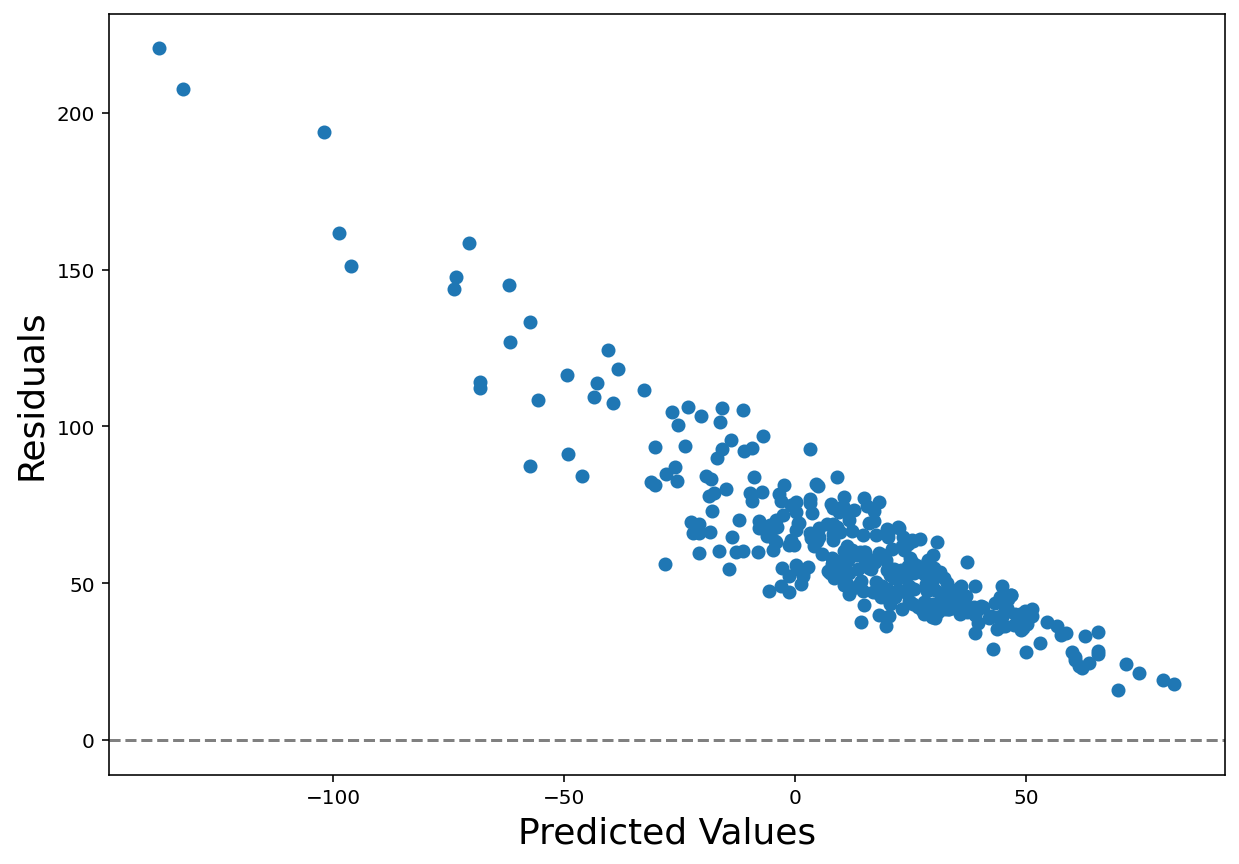

In [83]:
plt.figure(figsize=(10, 7))
plt.scatter(mvp_fit.predict(), mvp_fit.resid)    #change this if working with sklearn

plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Predicted Values', fontsize=18)
plt.ylabel('Residuals', fontsize=18);

In [84]:
# Create an empty model
lr_full = LinearRegression()

# Features
X = oscars_df[['Director_Avg_Score','budget','Lead_Actor_Avg_Score','Avg_Rating_by_Genre','Awards_Best Motion Picture of the Year']]
X = X.fillna(0)

# Target
y = oscars_df['metacritic score']

# Fit  
lr_full.fit(X, y)

# Score
lr_full.score(X, y)

0.7911782538399634

In [85]:
from sklearn.preprocessing import PolynomialFeatures

p = PolynomialFeatures()
X_poly = p.fit_transform(X)

lr_full = LinearRegression()
lr_full.fit(X_poly, y)
lr_full.score(X_poly, y)

0.7929835974099368

In [86]:
X.shape

(1136, 5)

In [87]:
X_poly.shape

(1136, 21)